### Moving Average

In [1]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt

#### Connect mysql

In [2]:
conn = pymysql.connect(
    host='192.168.100.120',
    port=16033,
    user='root',
    password='its@1234',
    db='UYeG_Cloud',
    charset='utf8'
)

curs = conn.cursor()

set_day1 = '2019-08-01'
set_day2 = '2019-10-25'



sql_peak = "SELECT DataSavedTime, Value FROM HisMeanHour \
    WHERE DefColumn = 'Item005' AND DefTable = 'HisItemCurr' AND DataSavedTime \
    BETWEEN '"+set_day1+"' and '"+set_day2+"' ORDER BY DataSavedTime ASC"
print(sql_peak)
curs.execute(sql_peak)
rows_peak=curs.fetchall()


data_peak = list(rows_peak)
df_peak = pd.DataFrame(data_peak)

df_peak.columns = ['DataSavedTime', 'Value']

print(df_peak)
print(len(df_peak))
conn.close()
print(df_peak['Value'].isna().sum())
print(df_peak.tail())

SELECT DataSavedTime, Value FROM HisMeanHour     WHERE DefColumn = 'Item005' AND DefTable = 'HisItemCurr' AND DataSavedTime     BETWEEN '2019-08-01' and '2019-10-25' ORDER BY DataSavedTime ASC
          DataSavedTime   Value
0   2019-08-27 12:00:00  31.522
1   2019-08-27 13:00:00  32.040
2   2019-08-27 14:00:00  30.146
3   2019-08-27 15:00:00  32.024
4   2019-08-27 16:00:00  31.901
..                  ...     ...
901 2019-10-24 20:00:00  31.985
902 2019-10-24 21:00:00  29.731
903 2019-10-24 22:00:00  29.915
904 2019-10-24 23:00:00  27.783
905 2019-10-25 00:00:00  25.867

[906 rows x 2 columns]
906
0
          DataSavedTime   Value
901 2019-10-24 20:00:00  31.985
902 2019-10-24 21:00:00  29.731
903 2019-10-24 22:00:00  29.915
904 2019-10-24 23:00:00  27.783
905 2019-10-25 00:00:00  25.867


In [3]:
ma12 = df_peak['Value'].rolling(window=12).mean()
ma24 = df_peak['Value'].rolling(window=24).mean()
ma120 = df_peak['Value'].rolling(window=120).mean()
ma720 = df_peak['Value'].rolling(window=720).mean()
print(ma12.tail())
print(ma24.tail())
print(ma120.tail())
print(ma720.tail())


901    35.003917
902    34.725500
903    33.471833
904    33.104000
905    32.577083
Name: Value, dtype: float64
901    34.148625
902    34.047792
903    33.426083
904    33.246542
905    32.987583
Name: Value, dtype: float64
901    32.582442
902    32.560792
903    32.540900
904    32.498667
905    32.440975
Name: Value, dtype: float64
901    32.698940
902    32.695571
903    32.694982
904    32.689078
905    32.680588
Name: Value, dtype: float64


In [4]:
new_df_peak = df_peak
new_df_peak.insert(len(df_peak.columns), "MA12", ma12)
new_df_peak.insert(len(new_df_peak.columns), "MA24", ma24)
new_df_peak.insert(len(new_df_peak.columns), "MA120", ma120)
new_df_peak.insert(len(new_df_peak.columns), "MA720", ma720)
print(new_df_peak.tail(5))

          DataSavedTime   Value       MA12       MA24      MA120      MA720
901 2019-10-24 20:00:00  31.985  35.003917  34.148625  32.582442  32.698940
902 2019-10-24 21:00:00  29.731  34.725500  34.047792  32.560792  32.695571
903 2019-10-24 22:00:00  29.915  33.471833  33.426083  32.540900  32.694982
904 2019-10-24 23:00:00  27.783  33.104000  33.246542  32.498667  32.689078
905 2019-10-25 00:00:00  25.867  32.577083  32.987583  32.440975  32.680588


#### Plot!

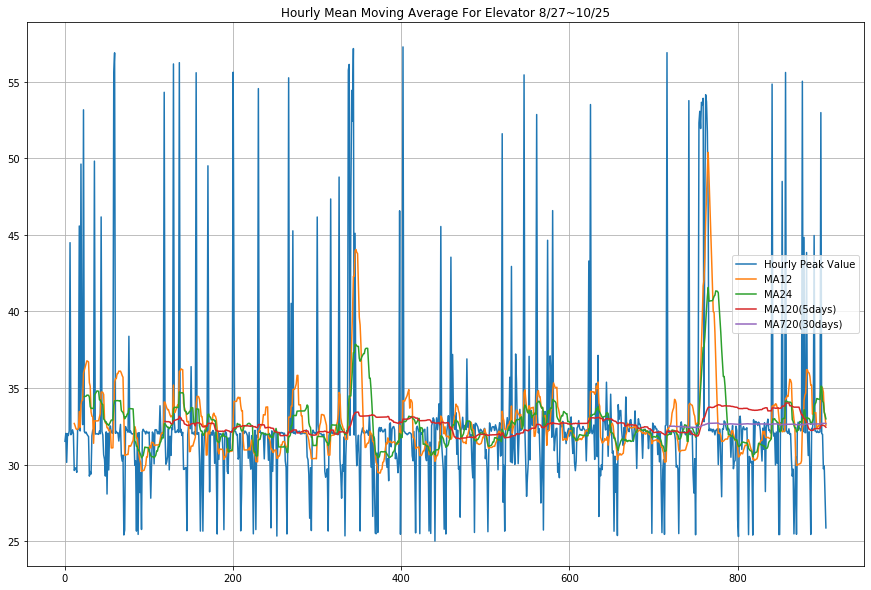

In [7]:
plt.figure(figsize=(15,10))
plt.plot(new_df_peak.index, new_df_peak['Value'], label="Hourly Peak Value")
plt.plot(new_df_peak.index, new_df_peak['MA12'], label="MA12")
plt.plot(new_df_peak.index, new_df_peak['MA24'], label="MA24")
plt.plot(new_df_peak.index, new_df_peak['MA120'], label="MA120(5days)")
plt.plot(new_df_peak.index, new_df_peak['MA720'], label="MA720(30days)")
plt.legend(loc='best')
plt.title("Hourly Mean Moving Average For Elevator 8/27~10/25")
plt.grid()
plt.show()

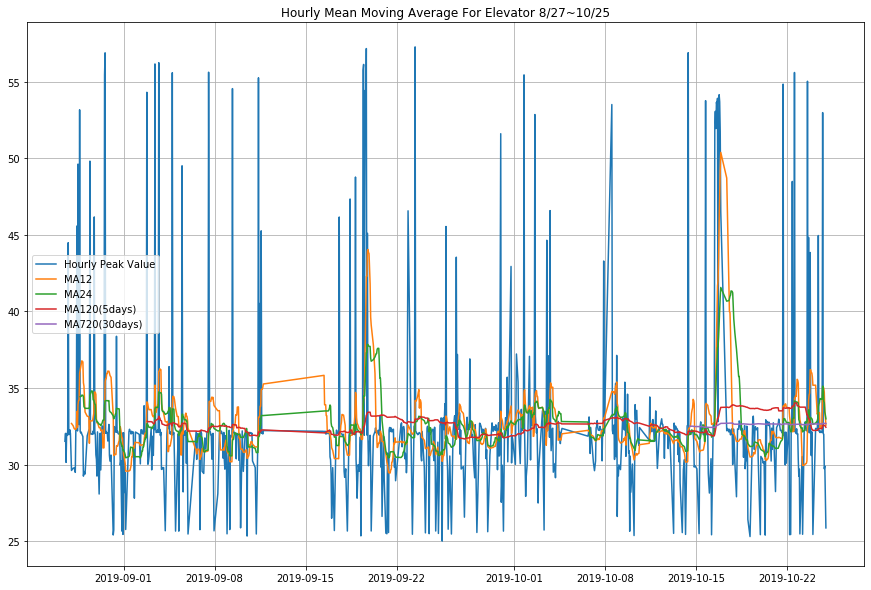

In [8]:
plt.figure(figsize=(15,10))
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['Value'], label="Hourly Peak Value")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA12'], label="MA12")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA24'], label="MA24")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA120'], label="MA120(5days)")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA720'], label="MA720(30days)")
plt.legend(loc='best')
plt.title("Hourly Mean Moving Average For Elevator 8/27~10/25")
plt.grid()
plt.show()